In [24]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('../data/bikes_rent.csv')

In [3]:
data.shape

(731, 13)

In [6]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [10]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


/Users/kremenevskiy/opt/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

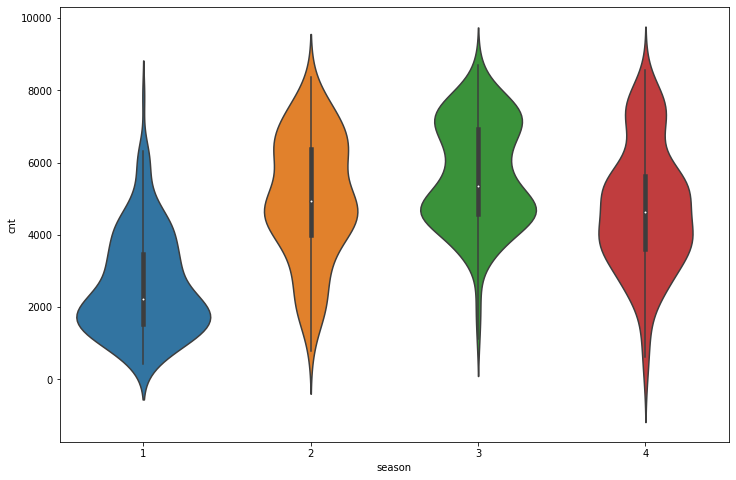

In [13]:
sns.violinplot(data['season'], data['cnt'])

<AxesSubplot:>

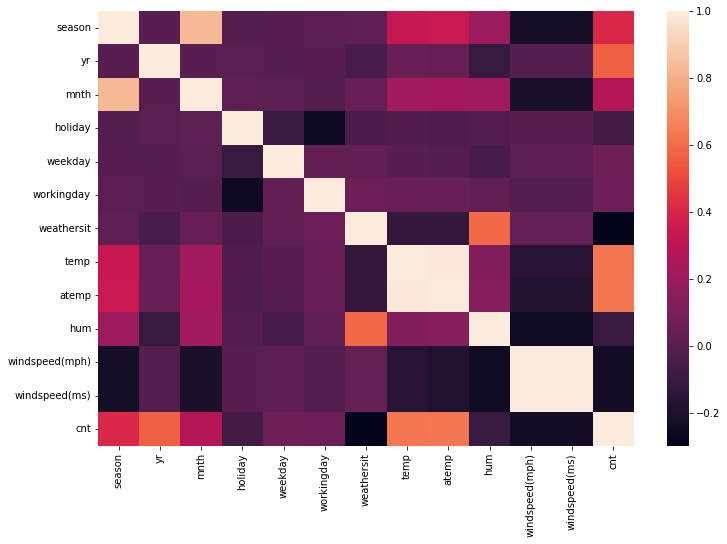

In [14]:
sns.heatmap(data.corr())

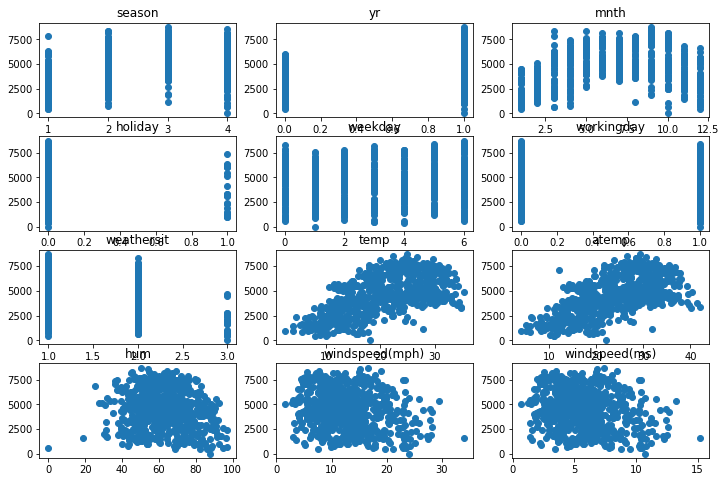

In [18]:
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4, 3, i+1)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

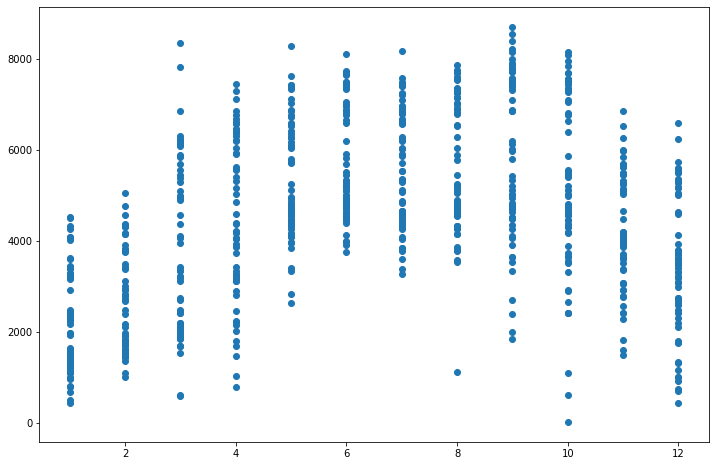

In [20]:
plt.scatter(data.mnth, data.cnt)

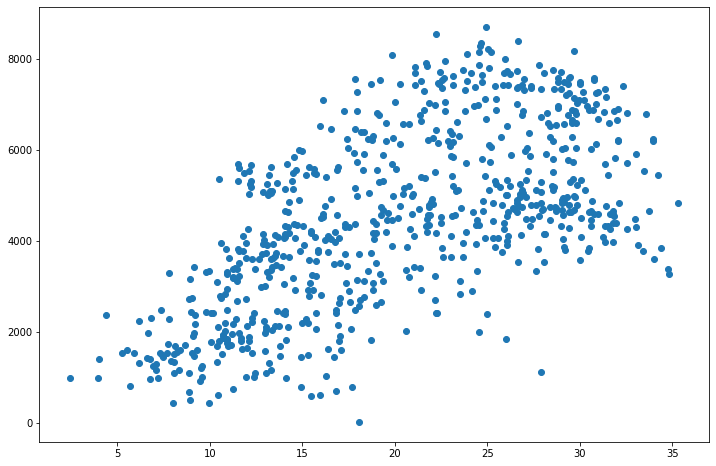

In [21]:
plt.scatter(data.temp, data.cnt)

In [28]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [32]:
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [35]:
train_part_size = int(.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[:train_part_size, :]
y_train, y_valid = y[:train_part_size], y[:train_part_size]

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [114]:
X_train_scaled_ext = pd.DataFrame(X_train_scaled, columns=data.columns[:-1])
X_valid_scaled_ext = pd.DataFrame(X_valid_scaled, columns=data.columns[:-1])

In [154]:
new_feat = data.columns.drop(['windspeed(ms)', 'atemp', 'cnt'])

In [163]:
new_feat = new_feat.insert(new_feat.shape[0], 'temp_2')

In [159]:
new_feat

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed(mph)', 'month_2'],
      dtype='object')

In [115]:
X_valid_scaled_ext.drop(['windspeed(ms)', 'atemp'], inplace=True, axis=1)
X_train_scaled_ext.drop(['windspeed(ms)', 'atemp'], inplace=True, axis=1)

In [143]:
X_train_scaled_ext['month_2'] = X_train_scaled_ext.mnth ** 2
X_valid_scaled_ext['month_2'] = X_valid_scaled_ext.mnth ** 2

In [164]:
X_train_scaled_ext['temp_2'] = X_train_scaled_ext.temp ** 2
X_valid_scaled_ext['temp_2'] = X_valid_scaled_ext.temp ** 2

In [165]:
X_train_scaled_ext

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(mph),month_2,temp_2
0,-1.107401,-0.632456,-1.315274,-0.167836,1.5,-1.481131,1.064463,-0.682435,1.172487,-0.457752,1.729946,0.465717
1,-1.107401,-0.632456,-1.315274,-0.167836,-1.5,-1.481131,1.064463,-0.574279,0.451962,0.666032,1.729946,0.329796
2,-1.107401,-0.632456,-1.315274,-0.167836,-1.0,0.675160,-0.736665,-1.510240,-1.247254,0.663098,1.729946,2.280826
3,-1.107401,-0.632456,-1.315274,-0.167836,-0.5,0.675160,-0.736665,-1.489876,-0.241685,-0.459665,1.729946,2.219730
4,-1.107401,-0.632456,-1.315274,-0.167836,0.0,0.675160,-0.736665,-1.338897,-1.249329,-0.120284,1.729946,1.792645
...,...,...,...,...,...,...,...,...,...,...,...,...
506,-0.184266,1.581139,-0.145378,-0.167836,-1.0,0.675160,1.064463,0.741082,1.208052,0.470407,0.021135,0.549203
507,-0.184266,1.581139,-0.145378,-0.167836,-0.5,0.675160,1.064463,0.834430,0.909872,-0.997096,0.021135,0.696273
508,-0.184266,1.581139,-0.145378,-0.167836,0.0,0.675160,1.064463,0.871770,0.967319,-1.203335,0.021135,0.759983
509,-0.184266,1.581139,-0.145378,-0.167836,0.5,0.675160,-0.736665,1.058459,0.587077,-0.298930,0.021135,1.120336


In [38]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [40]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

745.4706403873738

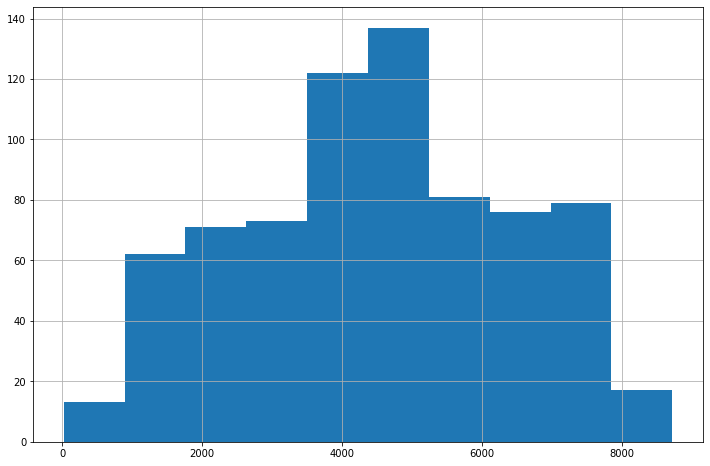

In [41]:
data['cnt'].hist();

In [47]:
pd.DataFrame(linreg.coef_, data.columns[:-1], columns=['coef']).sort_values(by='coef', ascending=False)

,coef
windspeed(ms),3.051193e+12
yr,9.540706e+02
atemp,8.911709e+02
season,4.048576e+02
weekday,1.037114e+02
temp,6.248634e+01
mnth,3.081084e+01
workingday,1.470224e+01
holiday,-6.757366e+01
hum,-1.589777e+02


In [93]:
def train_validate_report(model, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names, forest=False):
    
    model.fit(X_train_scaled, y_train)
    print("MSE=", np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled))))
    coef = model.feature_importances_ if forest else model.coef_
    print('Model coefficients:')

        
    print(pd.DataFrame(coef, feature_names[:-1], columns=['coef']).sort_values(by='coef', ascending=False))

In [54]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns)

MSE= 745.5316339611093
Model coefficients:
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [55]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns)

MSE= 745.5472585261746
Model coefficients:
                      coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [57]:
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns)

MSE= 745.6306240679426
Model coefficients:
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [58]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns)

MSE= 746.5264404569783
Model coefficients:
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [92]:
ridge_cv.alpha_

10.0

In [170]:
len(np.arange(0.001, 10, 0.001))

9999

In [171]:
model = RidgeCV(alphas=np.arange(0.001, 10, 0.001))

In [172]:
model.fit(X_train_scaled_ext, y_train)
print("MSE=", np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled_ext))))
coef = model.coef_
print('Model coefficients:')
print(pd.DataFrame(coef, new_feat, columns=['coef']).sort_values(by='coef', ascending=False))

MSE= 653.8616143882828
Model coefficients:
                      coef
yr              838.368662
temp            713.505263
season          340.167150
mnth            221.511085
weekday          92.973858
workingday       18.688858
holiday         -52.059754
hum            -192.704215
windspeed(mph) -264.091313
temp_2         -320.396823
weathersit     -323.885722
month_2        -344.893969


In [173]:
model.alpha_

8.352

In [174]:
forest = RandomForestRegressor(random_state=17, n_estimators=10000)

In [175]:
train_validate_report(forest, X_train, y_train, X_valid, y_valid, data.columns, forest=True)

MSE= 224.09257948936715
Model coefficients:
                    coef
atemp           0.276873
temp            0.267448
yr              0.199380
hum             0.068408
season          0.062089
weathersit      0.031079
mnth            0.027523
weekday         0.020316
windspeed(ms)   0.019578
windspeed(mph)  0.019514
workingday      0.004988
holiday         0.002804
